# Problem

run_id = run_obj.metadata.id is 1, but my rin is named 0001

### Import packages

In [9]:
import aurora
import mt_metadata
import mth5
import pathlib

from aurora.config.config_creator import ConfigCreator
from aurora.pipelines.process_mth5 import process_mth5
from aurora.pipelines.run_summary import RunSummary
from aurora.transfer_function.kernel_dataset import KernelDataset
from mth5.mth5 import MTH5
from mt_metadata.transfer_functions.processing.aurora.channel_nomenclature import CHANNEL_MAPS


### Check versions

In [10]:
print(f"aurora.__version__ {aurora.__version__}")
print(f"mt_metadata.__version__ {mt_metadata.__version__}")
print(f"mth5.__version__ {mth5.__version__}")

aurora.__version__ 0.3.3
mt_metadata.__version__ 0.3.0
mth5.__version__ 0.4.0


### Set some Paths
- this is a little overdone

In [11]:
my80_path = pathlib.Path(data_dir = pathlib.Path("/home/kkappler/data/gadi/g/data/my80"))
au_scope_mt_collection_path = my80_path.joinpath("AuScope_MT_collection")
auslamp_path = au_scope_mt_collection_path.joinpath(au_scope_mt_collection_path)
musgraves_path = auslamp_path.joinpath("Musgraves_APY")
data_dir = musgraves_path
#data_dir = pathlib.Path("/home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY")

# Existing Directory Structure:

The Musgraves dataset is organized by Territory (NT, SA, WA), and within each territory there are levels 0, 1, and 2. 

Use NT as an example to look at the level structure:

There are two folders of interest for this exercise, the MTH5 ones:
- level_0/Concatenated_Time_Series_MTH5_per_run
- level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5

Use pathlinb to index the hd5 files


Northern Territory (NT) has only two stations so we can use it to look at the tree

In [4]:
state_codes = ["NT", "SA", "WA",]

In [5]:
state_data_dirs = {}
for state_code in state_codes:
    state_data_dirs[state_code] = data_dir.joinpath(state_code, "level_1", "Concatenated_Resampled_Rotated_Time_Series_MTH5")

In [6]:
h5_lists = {}
for state_code in state_codes:
    h5_lists[state_code] = list(state_data_dirs[state_code].glob("*h5"))

In [7]:
h5_lists

{'NT': [PosixPath('/home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY/NT/level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5/WANT38.h5'),
  PosixPath('/home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY/NT/level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5/SA349.h5')],
 'SA': [],
 'WA': []}

In [8]:
current_list = h5_lists["NT"]
current_list.sort()
current_list

[PosixPath('/home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY/NT/level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5/SA349.h5'),
 PosixPath('/home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY/NT/level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5/WANT38.h5')]

In [9]:
mth5_path = current_list[0]

In [10]:
m = MTH5()

In [11]:
m.open_mth5(mth5_path, 'r')

In [12]:
print(m._MTH5__file_version)
print(m.filename)

0.2.0
/home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY/NT/level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5/SA349.h5


In [13]:
channel_summary_df = m.channel_summary.to_dataframe()
channel_summary_df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,none,SA349,1,-25.99472,130.49991,646.0,bx,2017-08-20 00:00:00+00:00,2017-10-18 23:59:59.999999+00:00,5184000,1.0,magnetic,0.0,0.0,nT,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,none,SA349,1,-25.99472,130.49991,646.0,by,2017-08-20 00:00:00+00:00,2017-10-18 23:59:59.999999+00:00,5184000,1.0,magnetic,90.0,0.0,nT,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,none,SA349,1,-25.99472,130.49991,646.0,bz,2017-08-20 00:00:00+00:00,2017-10-18 23:59:59.999999+00:00,5184000,1.0,magnetic,0.0,0.0,nT,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,none,SA349,1,-25.99472,130.49991,646.0,ex,2017-08-20 00:00:00+00:00,2017-10-18 23:59:59.999999+00:00,5184000,1.0,electric,0.0,0.0,mV/m,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,none,SA349,1,-25.99472,130.49991,646.0,ey,2017-08-20 00:00:00+00:00,2017-10-18 23:59:59.999999+00:00,5184000,1.0,electric,90.0,0.0,mV/m,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


In [14]:
m

/:
    |- Group: Experiment
    --------------------
        |- Group: Reports
        -----------------
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Surveys
        -----------------
            |- Group: AusLAMP_Musgraves
            ---------------------------
                |- Group: Filters
                -----------------
                    |- Group: coefficient
                    ---------------------
                        |- Group: bz_adjustment
                        -----------------------
                        |- Group: gain_b
                        ----------------
                        |- Group: gain_e
                        ----------------
                        |- Group: gain_eonly
                        --------------------
                    |- Group: fap
                    -------------
                    |- Group: fir
                    -------------
 

In [15]:
# musgraves_survey = m.get_survey("AusLAMP_Musgraves")
# musgraves_survey

In [16]:
# musgraves_survey.groups_list

In [17]:
# station_obj = m.get_station("SA349", survey="AusLAMP_Musgraves")
# station_obj

In [18]:
# station_obj.get_run("001")

In [19]:
m.close_mth5()

2023-10-20T16:14:20.231748-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing /home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY/NT/level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5/SA349.h5


In [20]:
mth5_run_summary = RunSummary()
mth5_run_summary.from_mth5s([mth5_path,])
run_summary = mth5_run_summary.clone()
run_summary.mini_summary
run_summary.df

2023-10-20T16:14:20.254154-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing /home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY/NT/level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5/SA349.h5


,survey,station_id,run_id,start,end,sample_rate,input_channels,output_channels,channel_scale_factors,valid,mth5_path
0,none,SA349,1,2017-08-20 00:00:00+00:00,2017-10-18 23:59:59.999999+00:00,1.0,"[bx, by]","[bz, ex, ey]","{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'ex': 1.0, '...",True,/home/kkappler/data/gadi/g/data/my80/AuScope_M...


In [21]:
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, "SA349", )
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,none,SA349,1,2017-08-20 00:00:00+00:00,2017-10-18 23:59:59.999999+00:00,5.184000e+06


In [22]:
kernel_dataset.df

,survey,station_id,run_id,start,end,sample_rate,input_channels,output_channels,channel_scale_factors,valid,mth5_path,remote,duration,fc
0,none,SA349,1,2017-08-20 00:00:00+00:00,2017-10-18 23:59:59.999999+00:00,1.0,"[bx, by]","[bz, ex, ey]","{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'ex': 1.0, '...",True,/home/kkappler/data/gadi/g/data/my80/AuScope_M...,False,5.184000e+06,False


In [23]:
kernel_dataset.df["survey"] = "AusLAMP_Musgraves"
#kernel_dataset.df["run_id"] = "1"
kernel_dataset.df["run_id"] = "001"


In [24]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset, )
config.channel_nomenclature.keyword = "musgraves"
config.set_default_input_output_channels()
#config.channel_nomenclature = CHANNEL_MAPS["musgraves"]
cfg_json = config.to_json()

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK


In [25]:
config

{
    "processing": {
        "band_setup_file": "/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg",
        "band_specification_style": "EMTF",
        "channel_nomenclature.ex": "ex",
        "channel_nomenclature.ey": "ey",
        "channel_nomenclature.hx": "bx",
        "channel_nomenclature.hy": "by",
        "channel_nomenclature.hz": "bz",
        "decimations": [
            {
                "decimation_level": {
                    "anti_alias_filter": "default",
                    "bands": [
                        {
                            "band": {
                                "center_averaging_type": "geometric",
                                "closed": "left",
                                "decimation_level": 0,
                                "frequency_max": 0.23828125,
                                "frequency_min": 0.19140625,
                                "index_max": 30,
                                "index_min": 25
 

In [26]:
#config.channel_nomenclature = {"}

('AusLAMP_Musgraves', 'SA349', '001', Timestamp('2017-08-20 00:00:00+0000', tz='UTC'))
              survey station_id run_id                     start  \
0  AusLAMP_Musgraves      SA349    001 2017-08-20 00:00:00+00:00   
1  AusLAMP_Musgraves      SA349    001 2017-08-20 00:00:00+00:00   
2  AusLAMP_Musgraves      SA349    001 2017-08-20 00:00:00+00:00   
3  AusLAMP_Musgraves      SA349    001 2017-08-20 00:00:00+00:00   

                               end input_channels output_channels  \
0 2017-10-18 23:59:59.999999+00:00       [bx, by]    [bz, ex, ey]   
1 2017-10-18 23:59:59.999999+00:00       [bx, by]    [bz, ex, ey]   
2 2017-10-18 23:59:59.999999+00:00       [bx, by]    [bz, ex, ey]   
3 2017-10-18 23:59:59.999999+00:00       [bx, by]    [bz, ex, ey]   

                               channel_scale_factors  valid  \
0  {'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'ex': 1.0, '...   True   
1  {'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'ex': 1.0, '...   True   
2  {'bx': 1.0, 'by': 1.0, 'bz': 1.0, 

/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 19.929573s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 15.164131s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 11.746086s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 9.195791s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np

Processing band 7.362526s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np

Processing band 5.856115s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multipl

Processing band 4.682492s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multipl

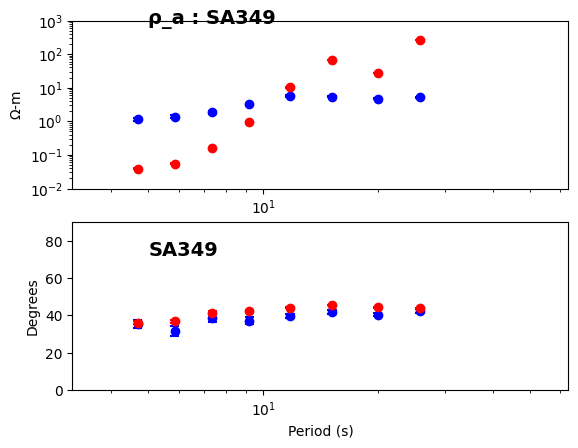

DECIMATION LEVEL 1
DATASET DF UPDATED
WARNING Run ID in dataset_df does not match run_obj
WARNING Setting run_obj metadata to match dataset_df
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
Skip saving FCs. dec_level_config.save_fc =  False
Processing band 102.915872s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 85.631182s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 68.881694s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 54.195827s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 43.003958s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 33.310722s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


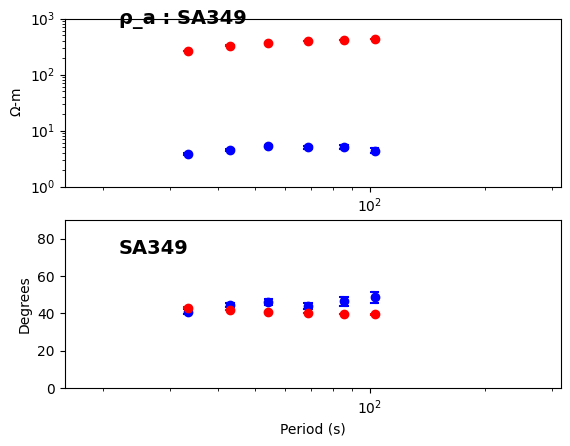

DECIMATION LEVEL 2
DATASET DF UPDATED
WARNING Run ID in dataset_df does not match run_obj
WARNING Setting run_obj metadata to match dataset_df
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
Skip saving FCs. dec_level_config.save_fc =  False
Processing band 411.663489s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 342.524727s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 275.526776s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 216.783308s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:275: RuntimeWarning: overflow encountered in multiply
  t = self.u0 * (t * r)


Processing band 172.015831s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 133.242890s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


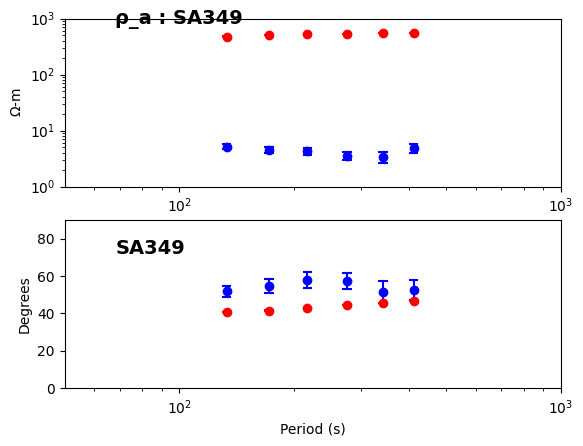

DECIMATION LEVEL 3
DATASET DF UPDATED
WARNING Run ID in dataset_df does not match run_obj
WARNING Setting run_obj metadata to match dataset_df
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
WARNING UNEXPECTED CHANNEL WITH NO FILTERS
Skip saving FCs. dec_level_config.save_fc =  False
Processing band 1514.701336s
Processing band 1042.488956s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 723.371271s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 532.971560s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


Processing band 412.837995s


/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:268: RuntimeWarning: overflow encountered in exp
  t = -np.exp(self.u0 * (r - self.u0))
/home/kkappler/software/irismt/aurora/aurora/transfer_function/regression/m_estimator.py:276: RuntimeWarning: invalid value encountered in multiply
  t = w * (1 + t)


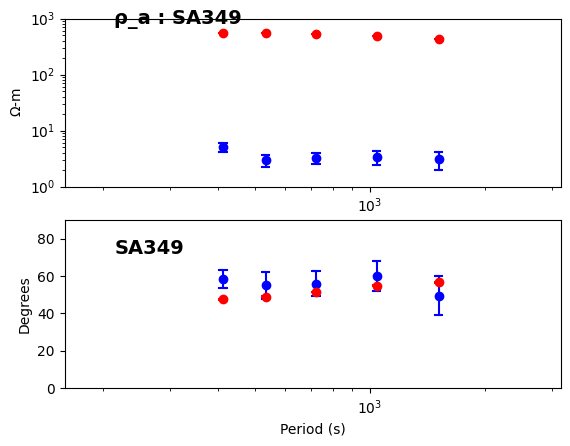

2023-10-20T16:15:56.858305-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing /home/kkappler/data/gadi/g/data/my80/AuScope_MT_collection/AuScope_AusLAMP/Musgraves_APY/NT/level_1/Concatenated_Resampled_Rotated_Time_Series_MTH5/SA349.h5


In [27]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

It can't find "1" which means it 

In [28]:
who

CHANNEL_MAPS	 ConfigCreator	 KernelDataset	 MTH5	 RunSummary	 aurora	 cc	 cfg_json	 channel_summary_df	 
config	 current_list	 data_dir	 h5_lists	 kernel_dataset	 m	 mt_metadata	 mth5	 mth5_path	 
mth5_run_summary	 pathlib	 process_mth5	 run_summary	 show_plot	 state_code	 state_codes	 state_data_dirs	 tf_cls	 



In [29]:
xml_file_name = "happy.xml"
tf_cls.write(fn=xml_file_name, file_type="emtfxml")

EMTFXML(station='SA349', latitude=-25.99, longitude=130.50, elevation=646.00)

In [31]:
tf_cls.transfer_function

<xarray.DataArray 'transfer_function' (period: 25, output: 3, input: 2)>
array([[[-9.39523450e-02-1.67989925e-02j,
         -9.01786896e-01-6.39745316e-01j],
        [ 1.64624725e-01+1.20576478e-01j,
          7.90304608e-01+2.71238924e-01j],
        [-8.96080429e-01+2.73865994e-04j,
         -6.09539798e-02-1.00721958e-02j]],

       [[-8.67241027e-02-1.52315006e-02j,
         -9.24947454e-01-5.71703749e-01j],
        [ 1.71922279e-01+1.28708888e-01j,
          7.86391350e-01+3.54166316e-01j],
        [-9.21952279e-01-5.17732791e-03j,
         -1.49310901e-02+2.09322428e-03j]],

       [[-7.13722591e-02-6.06476371e-03j,
         -8.71875880e-01-7.03124845e-01j],
        [ 2.44818908e-01+2.15656332e-01j,
          8.37029348e-01+4.89950820e-01j],
        [-9.23052735e-01+1.03589106e-02j,
         -1.03194088e-03+1.58760440e-02j]],
...
       [[-5.10887118e-02-2.68522043e-02j,
         -8.40609763e-02-1.24756336e-01j],
        [ 1.19301074e+00+1.49302100e+00j,
          4.76561545e-01+3.15276378e-01j],
        [ 1.03959114e-01+1.30756104e-02j,
         -3.73728099e-02+1.27839274e-02j]],

       [[-4.52383182e-02-2.55788833e-02j,
         -6.38810455e-02-1.10461242e-01j],
        [ 8.75147884e-01+1.24168684e+00j,
          4.09592414e-01+2.63970287e-01j],
        [ 9.42611604e-02+1.57302373e-02j,
         -3.21851648e-02+1.24951039e-02j]],

       [[-8.22079087e-02-2.73630585e-02j,
         -6.53913492e-02-7.67174262e-02j],
        [ 6.51205027e-01+9.92939260e-01j,
          3.47186668e-01+2.54454921e-01j],
        [ 8.66374258e-02+1.49463316e-02j,
         -2.46926747e-02+1.34646438e-02j]]])
Coordinates:
  * period   (period) float64 4.682 5.856 7.363 ... 723.4 1.042e+03 1.515e+03
  * output   (output) <U2 'ex' 'ey' 'bz'
  * input    (input) <U2 'bx' 'by'
Attributes: (12/14)
    survey:             0
    project:            AusLAMP
    id:                 SA349
    name:               275 Mile Post
    latitude:           -25.99472
    longitude:          130.49991
    ...                 ...
    datum:              None
    acquired_by:        Bruce Goleby
    start:              2017-08-19T06:33:44+00:00
    end:                2017-10-19T15:54:00+00:00
    runs_processed:     ['1']
    coordinate_system:  geomagnetic